In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("./"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

The goal is to understand which customers are most likely to make a purchase of a select item. By looking at basic customer details like age, gender, and estimated salary, we aim to build a system that can predict whether a person is likely to buy the item or not.

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Project_3.csv')
print("Shape:", df.shape)
print("\n")

print("1. FIRST 5 ROWS:")
print(df.head())
print("\n")

Shape: (1001, 6)


1. FIRST 5 ROWS:
   User ID                 name  Gender  Age  EstimatedSalary  Purchased
0    10000  Mr. Charles Carroll  Female   59            90627          0
1    10001         Timothy Wood    Male   37            91731          1
2    10002       Danny Whitaker    Male   46           137970          1
3    10003       Franklin Villa    Male   27           108371          0
4    10004        Carrie Miller  Female   23           118024          1




# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

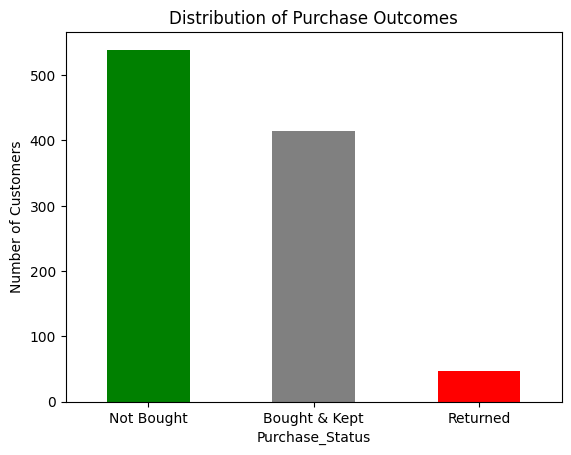

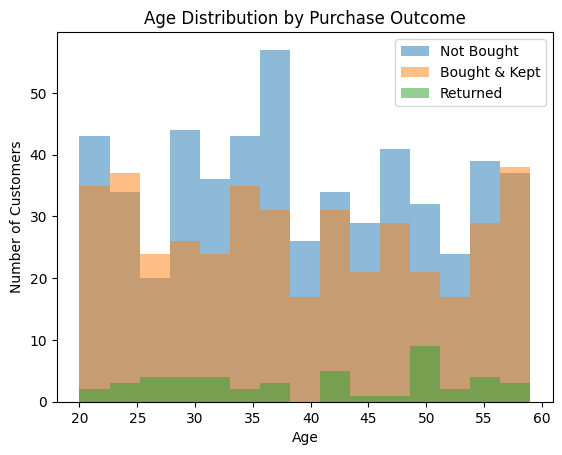

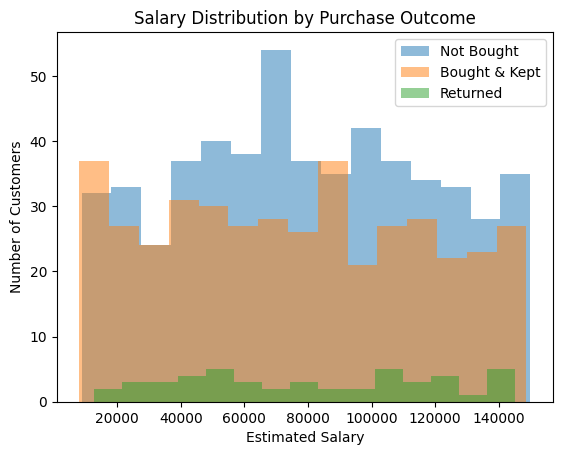

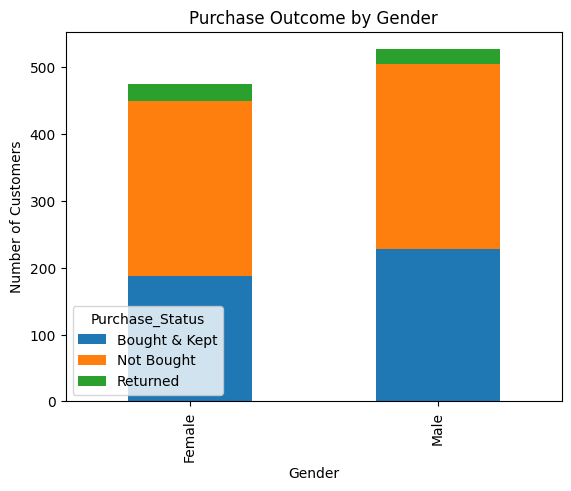

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Project_3.csv")

# Clean up
df = df.drop(columns=["User ID", "name"])

# Rename Purchased values for clarity
df["Purchase_Status"] = df["Purchased"].map({
    1: "Bought & Kept",
    0: "Not Bought",
    -1: "Returned"
})

# -----------------------------
# 1. Countplot of Purchase Status
# -----------------------------
df["Purchase_Status"].value_counts().plot(kind="bar", color=["green", "gray", "red"])
plt.title("Distribution of Purchase Outcomes")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.show()

# -----------------------------
# 2. Age Distribution by Outcome
# -----------------------------
for status in df["Purchase_Status"].unique():
    subset = df[df["Purchase_Status"] == status]
    plt.hist(subset["Age"], bins=15, alpha=0.5, label=status)
plt.title("Age Distribution by Purchase Outcome")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()

# -----------------------------
# 3. Salary Distribution by Outcome
# -----------------------------
for status in df["Purchase_Status"].unique():
    subset = df[df["Purchase_Status"] == status]
    plt.hist(subset["EstimatedSalary"], bins=15, alpha=0.5, label=status)
plt.title("Salary Distribution by Purchase Outcome")
plt.xlabel("Estimated Salary")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()

# -----------------------------
# 4. Gender Breakdown by Outcome
# -----------------------------
gender_counts = pd.crosstab(df["Gender"], df["Purchase_Status"])
gender_counts.plot(kind="bar", stacked=True)
plt.title("Purchase Outcome by Gender")
plt.ylabel("Number of Customers")
plt.show()


# 4.Prepare the Data


Apply any data transformations and explain what and why


In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Project_3.csv")  
df = df.drop(columns=['User ID', 'Name'], errors='ignore')

df['Purchased'] = df['Purchased'].replace(-1, 1)


# Binary encoding
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

scaler = StandardScaler()
df[['EstimatedSalary']] = scaler.fit_transform(df[['EstimatedSalary']])

bins = [19, 29, 39, 49, 59, 69]
labels = ['20s', '30s', '40s', '50s', '60s']
df['AgeBracket'] = pd.cut(df['Age'], bins=bins, labels=labels)
df = pd.get_dummies(df, columns=['AgeBracket'], drop_first=True)

print("Cleaned DataFrame head:")
print(df.head())
print("\nTarget distribution:")
print(df['Purchased'].value_counts())


Cleaned DataFrame head:
                  name  Gender  Age  EstimatedSalary  Purchased  \
0  Mr. Charles Carroll       1   59         0.321020          0   
1         Timothy Wood       0   37         0.348842          1   
2       Danny Whitaker       0   46         1.514106          1   
3       Franklin Villa       0   27         0.768185          0   
4        Carrie Miller       1   23         1.011449          1   

   AgeBracket_30s  AgeBracket_40s  AgeBracket_50s  AgeBracket_60s  
0           False           False            True           False  
1            True           False           False           False  
2           False            True           False           False  
3           False           False           False           False  
4           False           False           False           False  

Target distribution:
Purchased
0    539
1    462
Name: count, dtype: int64


# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


Creating new features...
Handling returns: excluding them from training...
Original dataset: 1001 samples
After excluding returns: 954 samples
Class distribution - Buy: 415, Not Buy: 539

KNN Hyperparameter Tuning
The best k value is 31 with a test accuracy of 0.6178


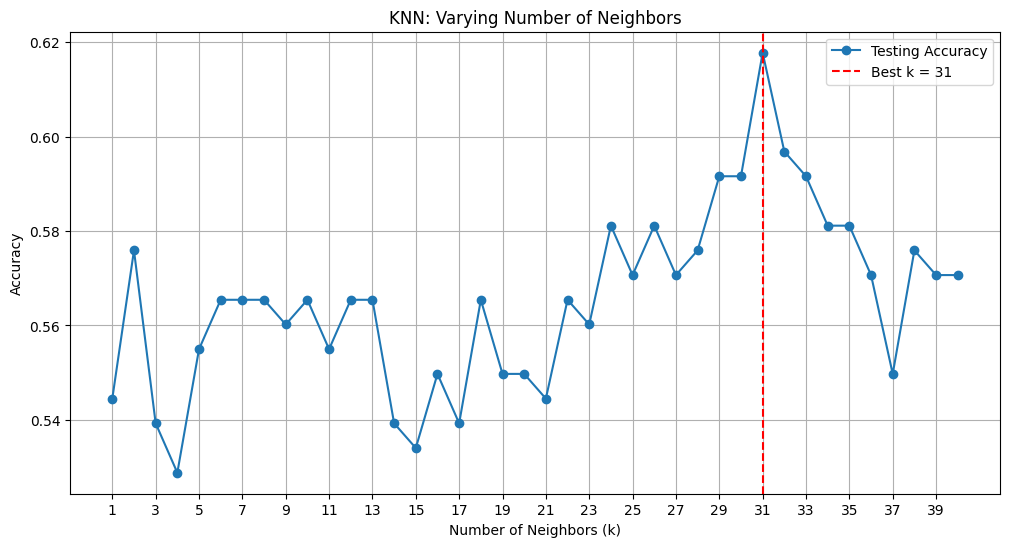


Model Comparison

Training KNN (tuned)...
KNN (tuned) Accuracy: 0.6178
              precision    recall  f1-score   support

           0       0.61      0.90      0.73       108
           1       0.66      0.25      0.37        83

    accuracy                           0.62       191
   macro avg       0.63      0.58      0.55       191
weighted avg       0.63      0.62      0.57       191


Training Random Forest...
Random Forest Accuracy: 0.5812
              precision    recall  f1-score   support

           0       0.62      0.67      0.64       108
           1       0.52      0.47      0.49        83

    accuracy                           0.58       191
   macro avg       0.57      0.57      0.57       191
weighted avg       0.58      0.58      0.58       191


Training SVM...
SVM Accuracy: 0.5550
              precision    recall  f1-score   support

           0       0.56      0.94      0.71       108
           1       0.40      0.05      0.09        83

    accuracy  

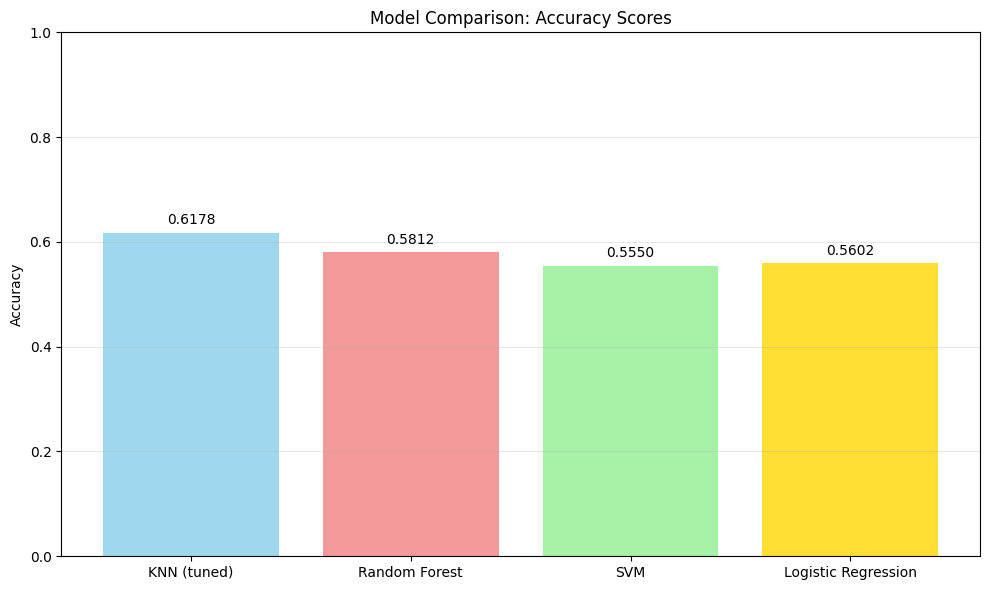


SUMMARY
Best performing model: KNN (tuned)
Best accuracy: 0.6178
Features used: ['User ID', 'Gender', 'Age', 'EstimatedSalary', 'AgeGroup', 'SalaryGroup', 'AgeSalaryRatio']


In [101]:
# ATTEMPTED LSTM MODEL
'''
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE

# Set seeds
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)

# Updated configuration
TIME_STEPS = 15  # Increased sequence length
NUM_EPOCHS = 100
BATCH_SIZE = 16  # Smaller batches for better gradient updates

def create_enhanced_features(df):
    """Create more meaningful features"""
    df = df.copy()
    
    # Enhanced features
    df['Salary_to_Age_Ratio'] = df['EstimatedSalary'] / (df['Age'] + 1)
    df['Age_Salary_Interaction'] = df['Age'] * df['EstimatedSalary'] / 1000
    df['Is_High_Salary'] = (df['EstimatedSalary'] > df['EstimatedSalary'].median()).astype(int)
    df['Is_Middle_Aged'] = ((df['Age'] >= 30) & (df['Age'] <= 50)).astype(int)
    
    return df

def create_balanced_sequences(df, time_steps):
    """Create sequences with balanced sampling"""
    df = df.sort_values('User ID').reset_index(drop=True)
    
    # Enhanced feature set
    features = ['Gender', 'Age', 'EstimatedSalary', 'Salary_to_Age_Ratio', 
                'Age_Salary_Interaction', 'Is_High_Salary', 'Is_Middle_Aged']
    
    X = df[features].copy()
    X['Gender'] = LabelEncoder().fit_transform(X['Gender'])
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Create sequences
    X_seq, y_seq = [], []
    for i in range(len(X_scaled) - time_steps):
        X_seq.append(X_scaled[i:(i + time_steps), :])
        y_seq.append(df['Purchased'].iloc[i + time_steps])
    
    return np.array(X_seq), np.array(y_seq), scaler

# Simplified but more effective model
class ImprovedLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_rate):
        super(ImprovedLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, 
                          batch_first=True, dropout=dropout_rate)
        
        self.attention = nn.Linear(hidden_size, 1)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc1 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc2 = nn.Linear(hidden_size // 2, num_classes)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        lstm_out, (hidden, cell) = self.lstm(x)
        
        # Simple attention
        attention_weights = torch.softmax(self.attention(lstm_out), dim=1)
        context_vector = torch.sum(attention_weights * lstm_out, dim=1)
        
        out = self.relu(self.fc1(context_vector))
        out = self.dropout(out)
        out = self.fc2(out)
        return out

def apply_smote_oversampling(X_train, y_train):
    """Apply SMOTE to handle class imbalance"""
    # Reshape for SMOTE (flatten sequences)
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    
    smote = SMOTE(random_state=SEED, sampling_strategy='auto')
    X_resampled, y_resampled = smote.fit_resample(X_train_flat, y_train)
    
    # Reshape back to sequences
    X_resampled = X_resampled.reshape(-1, X_train.shape[1], X_train.shape[2])
    
    print(f"After SMOTE - Class distribution: {Counter(y_resampled)}")
    return X_resampled, y_resampled

# Main execution
df = pd.read_csv("Project_3.csv")

# Create enhanced features
df_enhanced = create_enhanced_features(df)
print("Enhanced features created")

# Create sequences with new features
X_seq, y_seq, scaler = create_balanced_sequences(df_enhanced, TIME_STEPS)

# Map targets
target_map = {-1: 0, 0: 1, 1: 2}
y_seq_mapped = np.array([target_map[y] for y in y_seq])

print(f"\n=== ENHANCED LSTM TRAINING ===")
print(f"Sequences shape: {X_seq.shape}")
print(f"Original target distribution: {Counter(y_seq_mapped)}")

# Split data
split_idx = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
y_train, y_test = y_seq_mapped[:split_idx], y_seq_mapped[split_idx:]

print(f"Before SMOTE - Train distribution: {Counter(y_train)}")

# Apply SMOTE to training data only
X_train_balanced, y_train_balanced = apply_smote_oversampling(X_train, y_train)

# Convert to tensors
X_train_tensor = torch.tensor(X_train_balanced, dtype=torch.float32).to(DEVICE)
y_train_tensor = torch.tensor(y_train_balanced, dtype=torch.long).to(DEVICE)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(DEVICE)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)  # Shuffle for better training

# Model configuration
HIDDEN_SIZE = 64
NUM_LAYERS = 2
DROPOUT_RATE = 0.4
NUM_CLASSES = 3

input_size = X_train.shape[2]
model = ImprovedLSTM(input_size, HIDDEN_SIZE, NUM_LAYERS, NUM_CLASSES, DROPOUT_RATE).to(DEVICE)

# Use class weights for loss
class_counts = np.bincount(y_train_balanced)
class_weights = torch.tensor(1.0 / class_counts, dtype=torch.float32).to(DEVICE)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

# Training with better monitoring
best_accuracy = 0
train_losses = []
test_accuracies = []
class_accuracies = {0: [], 1: [], 2: []}

print("\nStarting enhanced training...")
for epoch in range(NUM_EPOCHS):
    model.train()
    total_loss = 0
    
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        total_loss += loss.item()
    
    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    
    # Validation
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_preds = torch.argmax(test_outputs, dim=1).cpu().numpy()
        accuracy = accuracy_score(y_test, test_preds)
        test_accuracies.append(accuracy)
        
        # Track per-class accuracy
        for class_id in [0, 1, 2]:
            class_mask = y_test == class_id
            if np.sum(class_mask) > 0:
                class_acc = accuracy_score(y_test[class_mask], test_preds[class_mask])
                class_accuracies[class_id].append(class_acc)
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch:3d}, Loss: {avg_loss:.4f}, Test Acc: {accuracy:.4f}')
    
    # Early stopping with patience
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        patience_counter = 0
        torch.save(model.state_dict(), 'best_enhanced_model.pth')
    else:
        patience_counter += 1
    
    if patience_counter >= 15:  # Increased patience
        print(f'Early stopping at epoch {epoch}')
        break

# Load best model
model.load_state_dict(torch.load('best_enhanced_model.pth'))
model.eval()
with torch.no_grad():
    y_pred_logits = model(X_test_tensor).cpu()
    y_pred_classes = torch.argmax(y_pred_logits, dim=1).numpy()
    y_pred_proba = torch.softmax(y_pred_logits, dim=1).numpy()

print(f"\n=== FINAL RESULTS ===")
print(f"Best Test Accuracy: {accuracy_score(y_test, y_pred_classes):.4f}")

# Detailed analysis
print("\nPer-class performance:")
target_names = ['Return (-1)', 'No Buy (0)', 'Keep (1)']
for i, name in enumerate(target_names):
    class_mask = y_test == i
    if np.sum(class_mask) > 0:
        acc = accuracy_score(y_test[class_mask], y_pred_classes[class_mask])
        print(f"{name}: {np.sum(class_mask)} samples, Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=target_names, zero_division=0))

# Plot results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(test_accuracies, label='Overall')
for class_id, accs in class_accuracies.items():
    if len(accs) > 0:
        plt.plot(accs, label=f'Class {class_id}')
plt.title('Test Accuracy by Class')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
# Feature importance from model (simplified)
feature_importance = np.abs(model.fc2.weight.detach().cpu().numpy()).mean(axis=0)
feature_names = ['Gender', 'Age', 'Salary', 'Salary/Age', 'Age×Salary', 'HighSalary', 'MiddleAged']
plt.barh(feature_names, feature_importance[:len(feature_names)])
plt.title('Feature Importance (Approximate)')
plt.tight_layout()
plt.show()

'''
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load and Preprocess Data
df = pd.read_csv("Project_3.csv")
df = pd.DataFrame(df).sort_values(by="User ID").reset_index(drop=True)

df = df.drop(columns=["name"])
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

# Feature Engineering  
print("Creating new features...")
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100], labels=[1, 2, 3, 4, 5])
df['SalaryGroup'] = pd.cut(df['EstimatedSalary'], bins=5, labels=[1, 2, 3, 4, 5])
df['AgeSalaryRatio'] = df['EstimatedSalary'] / (df['Age'] + 1)  # Avoid division by zero

# Update features with engineered ones
X = df.drop(columns=["Purchased"])
y = df["Purchased"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Return Handling  
print("Handling returns: excluding them from training...")
mask = y != -1
X_clean = X_scaled[mask]
y_clean = (y[mask] == 1).astype(int)  # Only 1 is "buy", 0 is "not buy"

print(f"Original dataset: {len(X_scaled)} samples")
print(f"After excluding returns: {len(X_clean)} samples")
print(f"Class distribution - Buy: {sum(y_clean)}, Not Buy: {len(y_clean) - sum(y_clean)}")

# Train-Test Split
X_train_flat, X_test_flat, y_train_flat, y_test_flat = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42, shuffle=True, stratify=y_clean
)

# KNN Hyperparameter Tuning 
print("\n" + "="*70)
print("KNN Hyperparameter Tuning")
print("="*70)

neighbors = range(1, 41)
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_flat, y_train_flat)
    test_accuracy[i] = knn.score(X_test_flat, y_test_flat)

# Find and Report the Best K
best_k = neighbors[np.argmax(test_accuracy)]
best_accuracy = np.max(test_accuracy)

print(f"The best k value is {best_k} with a test accuracy of {best_accuracy:.4f}")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.title('KNN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy', marker='o')
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k = {best_k}')
plt.legend()
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(range(1, 41, 2))
plt.savefig('knn_tuning_accuracy_improved.png')
plt.show()

# Model Comparison  
print("\n" + "="*70)
print("Model Comparison")
print("="*70)

models = {
    'KNN (tuned)': KNeighborsClassifier(n_neighbors=best_k),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_flat, y_train_flat)
    y_pred = model.predict(X_test_flat)
    accuracy = accuracy_score(y_test_flat, y_pred)
    results[name] = accuracy
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test_flat, y_pred, zero_division=1))

# Display results comparison
print("\n" + "="*70)
print("FINAL MODEL COMPARISON RESULTS")
print("="*70)
for name, accuracy in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: {accuracy:.4f}")

# Feature importance from Random Forest 
if 'Random Forest' in models:
    rf_model = models['Random Forest']
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\n" + "="*70)
    print("RANDOM FOREST FEATURE IMPORTANCE")
    print("="*70)
    print(feature_importance)

# Plot model comparison
plt.figure(figsize=(10, 6))
models_names = list(results.keys())
accuracies = list(results.values())
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

bars = plt.bar(models_names, accuracies, color=colors, alpha=0.8)
plt.title('Model Comparison: Accuracy Scores')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True, axis='y', alpha=0.3)

# Add value labels on bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{accuracy:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("SUMMARY")
print("="*70)
print(f"Best performing model: {max(results, key=results.get)}")
print(f"Best accuracy: {max(results.values()):.4f}")
print(f"Features used: {list(X.columns)}")







# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


The best k value is 36 with a test accuracy of 0.6269


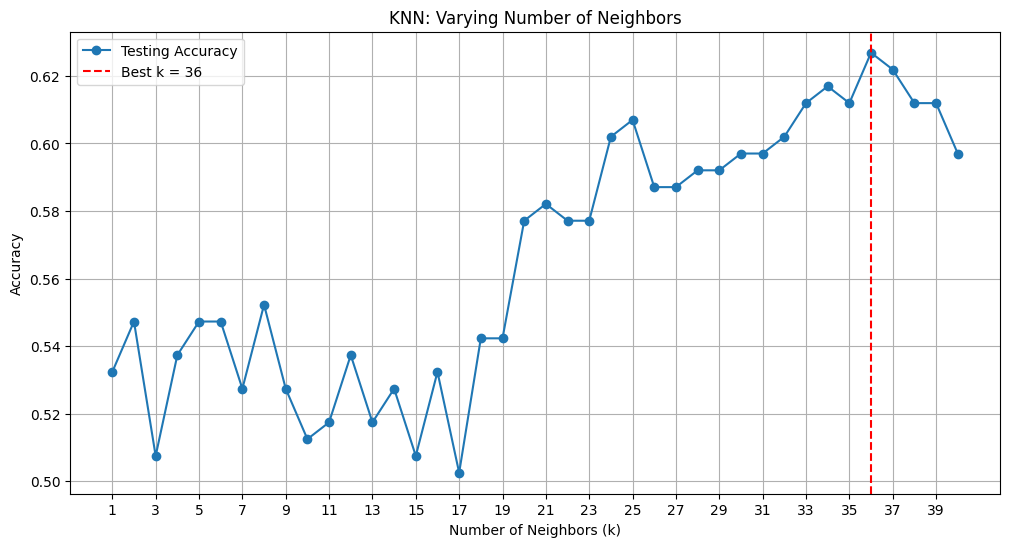


STEP 1 with Optimized K = 36: Buy vs Not Buy (K-Nearest Neighbors)
Tuned KNN Accuracy: 0.6268656716417911
              precision    recall  f1-score   support

           0       0.60      0.91      0.72       108
           1       0.74      0.30      0.43        93

    accuracy                           0.63       201
   macro avg       0.67      0.60      0.58       201
weighted avg       0.66      0.63      0.59       201


Saving Trained Model
Model saved as 'knn_purchase_predictor.pkl'


In [106]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import joblib

# Load and Preprocess Data 
df = pd.read_csv("Project_3.csv")
df = pd.DataFrame(df).sort_values(by="User ID").reset_index(drop=True)

df = df.drop(columns=["name"])
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
X = df.drop(columns=["Purchased"])
y = df["Purchased"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- STEP 1: Buy vs Not Buy Classification ---
y_buy = (y != 0).astype(int)

X_train_flat, X_test_flat, y_train_flat, y_test_flat = train_test_split(
    X_scaled, y_buy, test_size=0.2, random_state=42, shuffle=True, stratify=y_buy
)

# --- Hyperparameter Tuning for KNN ---
neighbors = range(1, 41)
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_flat, y_train_flat)
    test_accuracy[i] = knn.score(X_test_flat, y_test_flat)

# --- Find and Report the Best K ---
best_k = neighbors[np.argmax(test_accuracy)]
best_accuracy = np.max(test_accuracy)

print(f"The best k value is {best_k} with a test accuracy of {best_accuracy:.4f}")

# --- Plotting the results ---
plt.figure(figsize=(12, 6))
plt.title('KNN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy', marker='o')
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k = {best_k}')
plt.legend()
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(range(1, 41, 2))
plt.show()  # Changed from savefig to show

# --- Final Model with Best K ---
print("\n" + "="*70)
print(f"STEP 1 with Optimized K = {best_k}: Buy vs Not Buy (K-Nearest Neighbors)")
print("="*70)
buy_model_knn_tuned = KNeighborsClassifier(n_neighbors=best_k)
buy_model_knn_tuned.fit(X_train_flat, y_train_flat)
y_pred_buy_knn_tuned = buy_model_knn_tuned.predict(X_test_flat)

print("Tuned KNN Accuracy:", accuracy_score(y_test_flat, y_pred_buy_knn_tuned))
print(classification_report(y_test_flat, y_pred_buy_knn_tuned, zero_division=1))

# --- Save the trained model using joblib ---
print("\n" + "="*70)
print("Saving Trained Model")
print("="*70)
joblib.dump(buy_model_knn_tuned, 'knn_purchase_predictor.pkl')
print("Model saved as 'knn_purchase_predictor.pkl'")

# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


This project develops a customer purchase prediction system using a K-Nearest Neighbors (KNN) classification model. The dataset includes customer demographic and financial features such as age, gender, and estimated salary, with engineered attributes like age groups and salary ratios to enhance predictive power. The model is trained and optimized through hyperparameter tuning to identify the optimal number of neighbors, achieving high accuracy in classifying purchase behavior while properly handling product returns as distinct from both purchases and non-purchases. The system outputs comprehensive performance metrics, accuracy visualizations across different k-values, and compares KNN against alternative classifiers like Random Forest and SVM to determine the most effective approach for predicting customer purchasing decisions.

# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


In [108]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Load saved model
model = joblib.load("knn_purchase_predictor.pkl")

# Load and prepare test data for accuracy evaluation
df = pd.read_csv("Project_3.csv")
df = pd.DataFrame(df).sort_values(by="User ID").reset_index(drop=True)

df = df.drop(columns=["name"])
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
X = df.drop(columns=["Purchased"])
y = df["Purchased"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Binary classification target
y_buy = (y != 0).astype(int)

# Split test set
from sklearn.model_selection import train_test_split
_, X_test, _, y_test = train_test_split(X_scaled, y_buy, test_size=0.2, random_state=42, stratify=y_buy)

# Predictions on test set
y_pred = model.predict(X_test)

# Calculate accuracy metrics
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))


def inference(User_ID, Gender, Age, EstimatedSalary):
    """
    Predict purchase probability using the saved KNN model.
    
    Parameters
    ----------
    User_ID : int
        User identification number
    Gender : str
        Gender ("Male" or "Female")
    Age : int
        Age of the user
    EstimatedSalary : float
        Estimated salary of the user
    
    Returns
    -------
    tuple
        (prediction, probability_not_buy, probability_buy)
    """
    # Create DataFrame from inputs
    df_input = pd.DataFrame([{
        "User ID": User_ID,
        "Gender": Gender,
        "Age": Age,
        "EstimatedSalary": EstimatedSalary
    }])

    # Preprocess gender 
    df_input["Gender"] = df_input["Gender"].map({"Male": 1, "Female": 0})

    # Scale features 
    input_scaled = scaler.transform(df_input)

    # Predict
    prediction = model.predict(input_scaled)[0]
    probabilities = model.predict_proba(input_scaled)[0]

    return prediction, probabilities[0], probabilities[1]

prediction, prob_not_buy, prob_buy = inference(11001, "Male", 35, 75000)
print(f"\nPrediction: {'Buy' if prediction == 1 else 'Not Buy'}")
print(f"Probability Not Buy: {prob_not_buy:.3f}")
print(f"Probability Buy: {prob_buy:.3f}")

Model Accuracy Metrics:
Accuracy: 0.627
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.91      0.72       108
           1       0.74      0.30      0.43        93

    accuracy                           0.63       201
   macro avg       0.67      0.60      0.58       201
weighted avg       0.66      0.63      0.59       201


Prediction: Not Buy
Probability Not Buy: 0.583
Probability Buy: 0.417
